### Zadanie 1

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.integrate


def f(x):
    return 4 / (1 + x**2)

trapz_results = np.empty(25, dtype=np.double)
simps_results = np.empty(25, dtype=np.double)

for i in range(1, 26):
    # n - number of nodes
    n = 2 ** i + 1
    x = np.linspace(0, 1, n)
    y = f(x)
    trapz_results[i-1] = scipy.integrate.trapezoid(y, x)
    simps_results[i-1] = scipy.integrate.simpson(y, x=x)


# calculate relative error
trapz_error = abs((trapz_results - np.pi) / np.pi)
simps_error = abs((simps_results - np.pi) / np.pi)

[2.62902329e-03 7.64775751e-06 4.81065190e-08 7.52793755e-10
 1.17638116e-11 1.83765382e-13 2.82715972e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41357986e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.41357986e-16
 2.82715972e-16 1.41357986e-16 4.24073958e-16 1.55493784e-15
 2.12036979e-15]


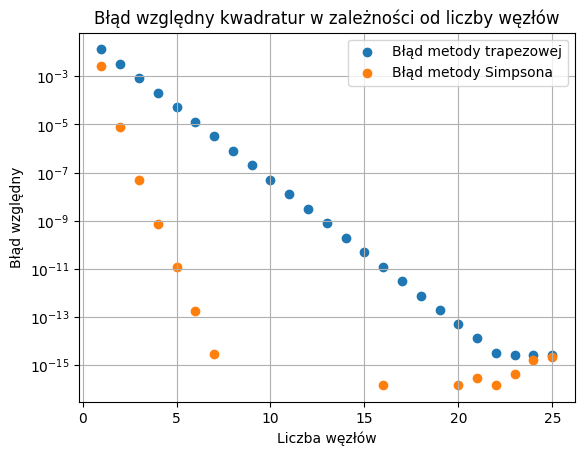

In [ ]:
# draw
xs = np.arange(1, 26, 1)
plt.scatter(xs, trapz_error, label="Błąd metody trapezowej")
plt.scatter(xs, simps_error, label="Błąd metody Simpsona")
plt.xlabel("Liczba węzłów")
plt.ylabel("Błąd względny")
plt.yscale("log")
plt.title("Błąd względny kwadratur w zależności od liczby węzłów")
plt.legend()
plt.grid()
plt.show()